# Preprocessing Eye-Tracking Data

In [2]:
import pandas as pd
import numpy as np
from pathlib import Path

import matplotlib.pyplot as plt
import seaborn as sns

## Dataframe setup

In [57]:
# paths and files
data_dir = Path('.').resolve().parent / "data"
files = data_dir.glob('**/*.csv')  # all files for all subjects
files = (data_dir / "sub-01").glob('*.csv')  # for single subject 
data_files = sorted(list(files))

# load into one dataframe
df = pd.concat(map(lambda f: pd.read_csv(f, index_col=None, header=0), data_files), ignore_index=True)

In [58]:
df.co

,TrialNumber,quadrant,speed,speed_px,motion_cycle,ran,order,n_cue,saccade_delay,sub,...,target_pos_x,target_pos_y,saccade_spos_x,saccade_spos_y,saccade_epos_x,saccade_epos_y,saccade_spos_x_deg,saccade_spos_y_deg,saccade_epos_x_deg,saccade_epos_y_deg
0,1,1,0.83,19.1,200.0,1.0,0.0,5.0,482.0,1.0,...,-9.5,12.0,2.5,-1.0,-282.5,-291.0,0.11,-0.04,-12.33,-12.70
1,2,2,0.83,19.1,200.0,1.0,1.0,7.0,571.0,1.0,...,12.5,12.0,2.5,-1.0,231.5,-202.0,0.11,-0.04,10.10,-8.82
2,3,1,0.83,19.1,200.0,1.0,2.0,6.0,548.0,1.0,...,-12.5,8.0,-2.5,2.0,-231.5,-180.0,-0.11,0.09,-10.10,-7.86
3,4,1,0.83,19.1,200.0,1.0,3.0,5.0,402.0,1.0,...,-9.5,12.0,-3.5,-4.0,-324.5,-328.0,-0.15,-0.17,-14.16,-14.31
4,5,2,0.83,19.1,200.0,1.0,4.0,6.0,451.0,1.0,...,9.5,8.0,1.5,-1.0,181.5,-114.0,0.07,-0.04,7.92,-4.97
5,6,1,0.83,19.1,200.0,1.0,5.0,5.0,506.0,1.0,...,-9.5,12.0,2.5,1.0,-286.5,-301.0,0.11,0.04,-12.50,-13.14
6,7,2,0.83,19.1,200.0,1.0,6.0,4.0,422.0,1.0,...,9.5,8.0,1.5,-2.0,377.5,-187.0,0.07,-0.09,16.47,-8.16
7,8,2,0.83,19.1,200.0,1.0,7.0,6.0,585.0,1.0,...,9.5,8.0,1.5,1.0,175.5,-129.0,0.07,0.04,7.66,-5.63


## Plotting

In [59]:
targets = []
for idx, row in df.iterrows():
    target = (row["target_pos_x"], row["target_pos_y"])
    if not target in targets:
        targets.append(target)

In [60]:
targets

[(-9.5, 12.0), (12.5, 12.0), (-12.5, 8.0), (9.5, 8.0)]

Text(0.5, 1.0, 'Saccade landing positions')

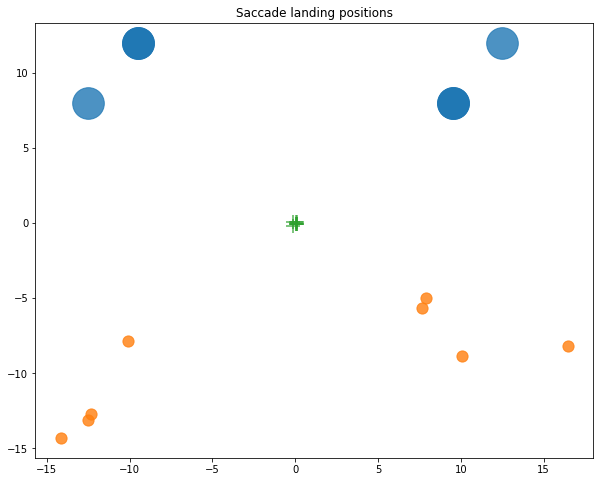

In [70]:
fig, ax = plt.subplots(figsize=(10, 8))

# ax.scatter(targets[0][0], targets[0][1], marker='o', cmap='jet', alpha=.8, s=500, edgecolors='none', data=df)
ax.scatter("target_pos_x", "target_pos_y", marker='o', cmap='jet', alpha=.8, s=1000, data=df)
ax.scatter("saccade_epos_x_deg", "saccade_epos_y_deg", marker='.', alpha=.8, s=500, data=df)
ax.scatter("saccade_spos_x_deg", "saccade_spos_y_deg", marker='+', alpha=.8, s=200, data=df)
ax.set_title("Saccade landing positions")
# ax.invert_yaxis()